In [30]:
import pandas as pd
df=pd.read_csv('/content/customers (1).csv')

In [31]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [32]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [33]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [34]:
df.shape

(10695, 11)

In [35]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [36]:
clean=df.dropna(axis=0)

In [37]:
clean.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [38]:
clean.shape

(8819, 11)

In [39]:
clean.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [40]:
clean['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [41]:
clean['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
clean['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
clean['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [44]:
clean['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [45]:
clean['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [46]:
clean['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [47]:
from sklearn.preprocessing import OrdinalEncoder
categorylist=[['Male', 'Female'],['No', 'Yes'],['No', 'Yes'],['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],['Low', 'High', 'Average']]
    
enc=OrdinalEncoder(categories=categorylist)

In [48]:
cust1=clean.copy()

In [49]:
# INPUT---> OrdinalEncoder
cust1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']]=enc.fit_transform(cust1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']])

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
cust1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [52]:
#OUTPUT--> LabelEncoder
cust1['Segmentation'] = le.fit_transform(cust1['Segmentation'])

In [53]:
cust1=cust1.drop('ID',axis=1)
cust1=cust1.drop('Var_1',axis=1)

In [54]:
cust1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

<Axes: >

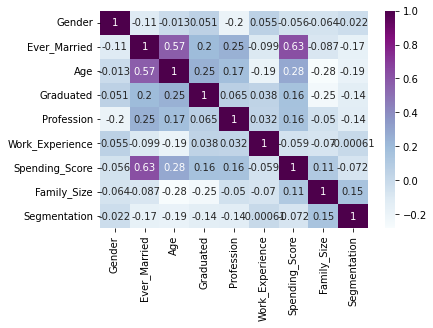

In [55]:
import seaborn as sns
# Calculate the correlation matrix
corr = cust1.corr()

# Plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

<Axes: xlabel='Family_Size', ylabel='Spending_Score'>

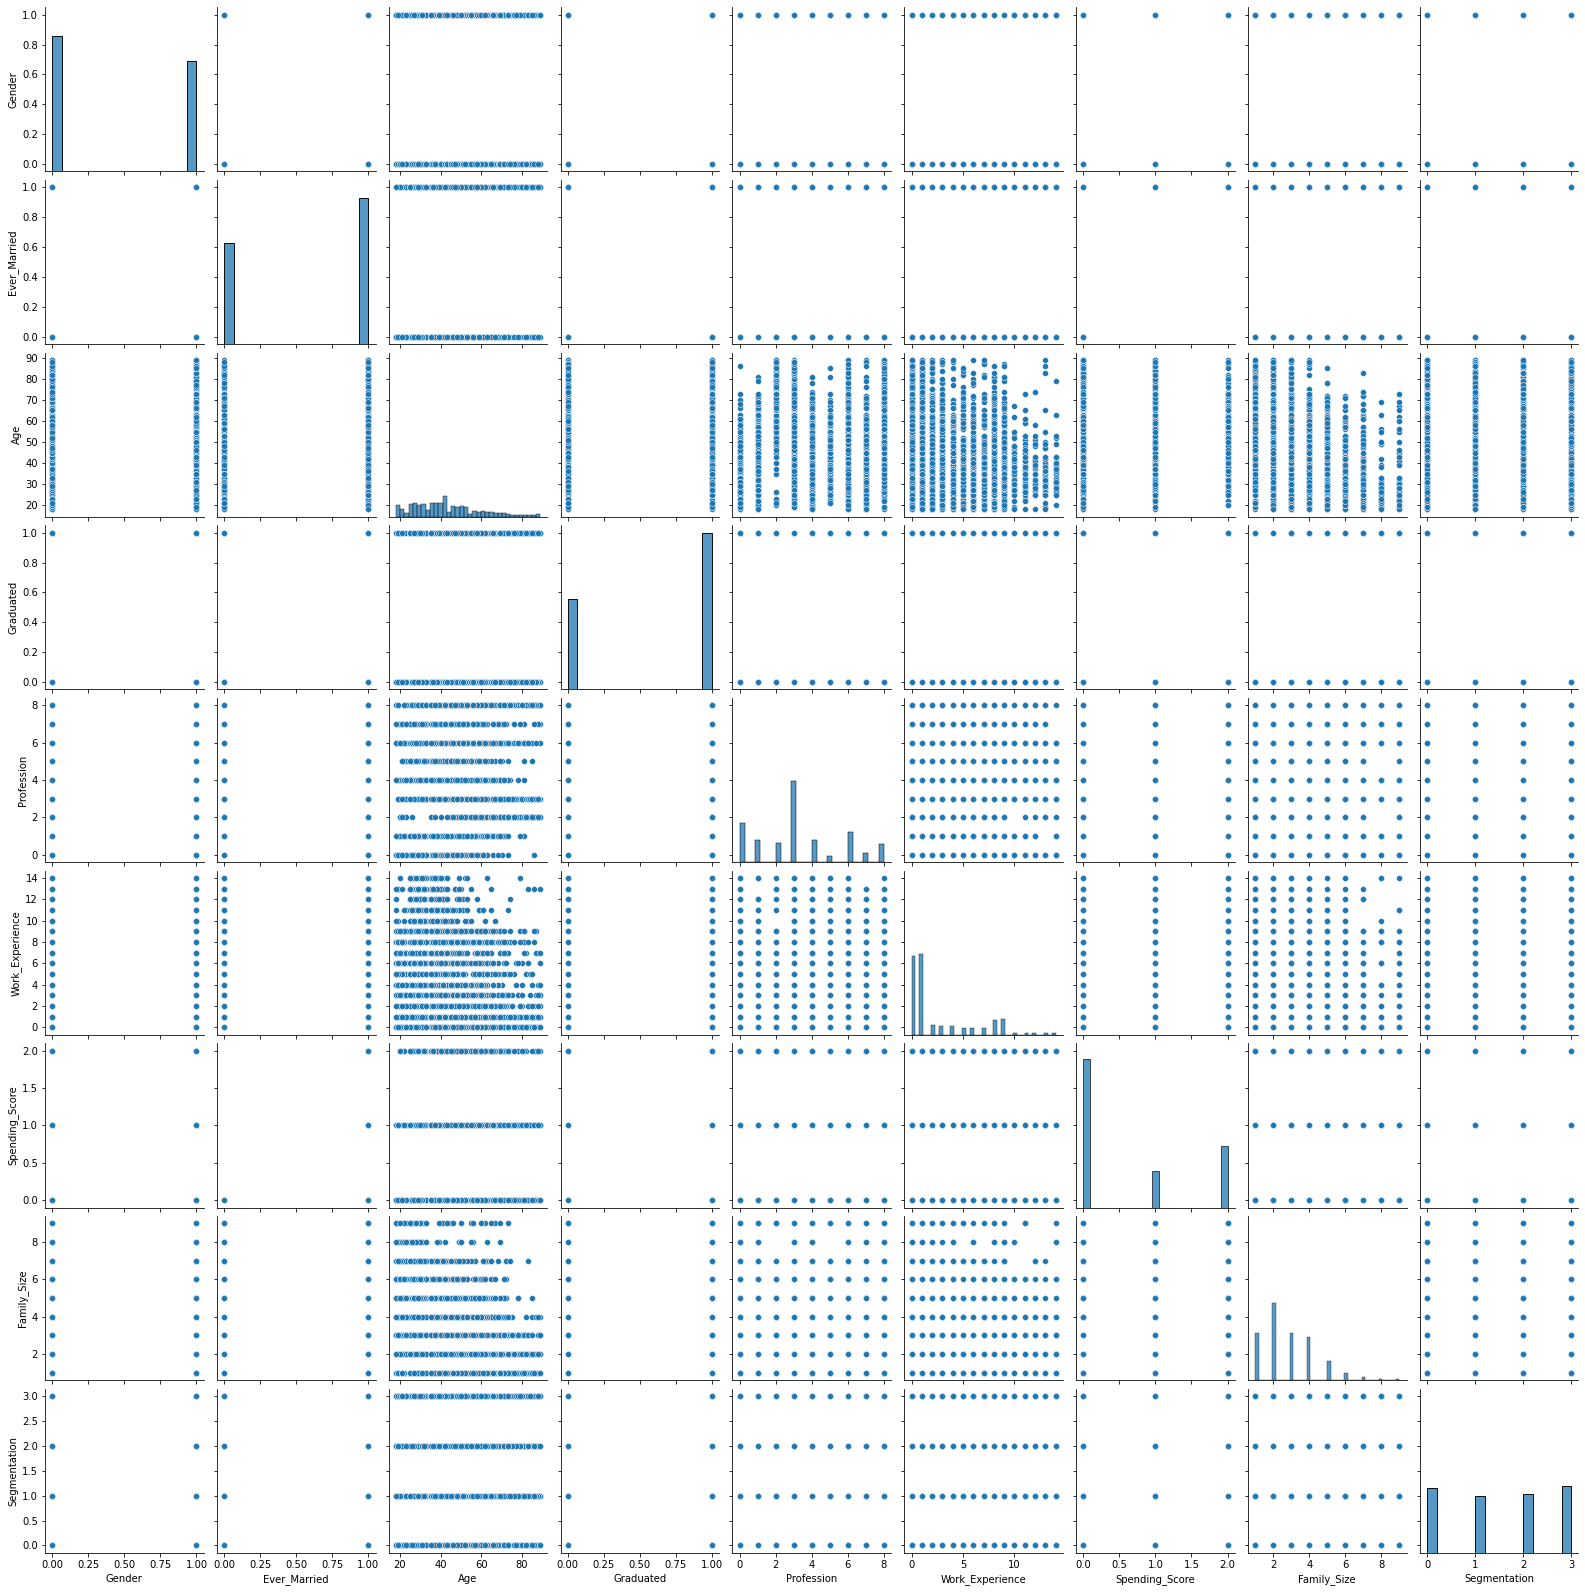

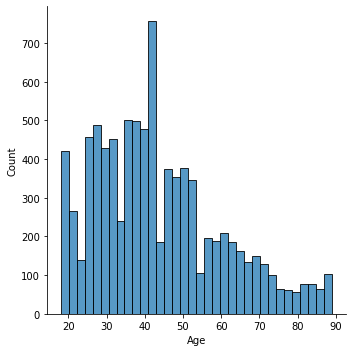

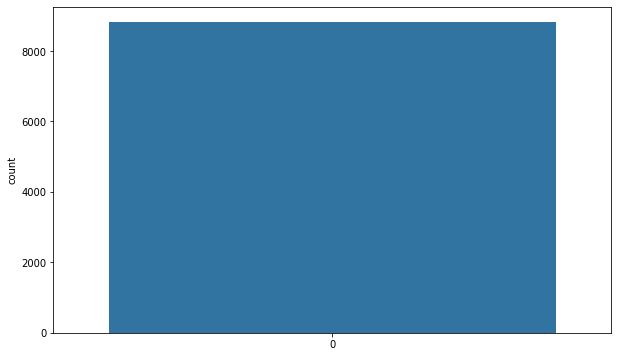

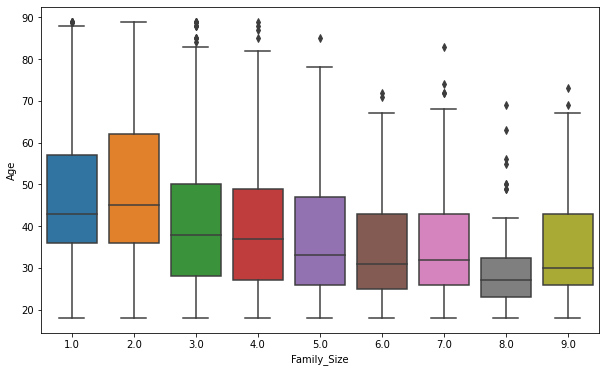

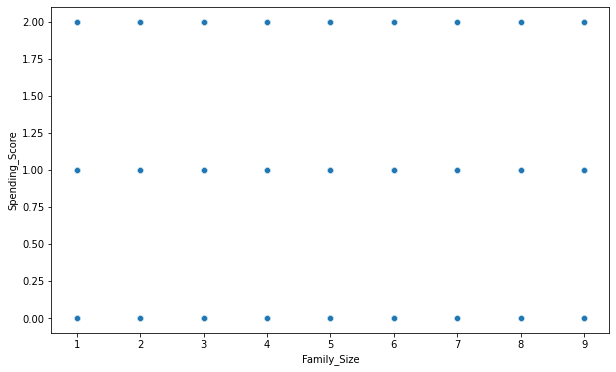

In [56]:
import matplotlib.pylab as plt
sns.pairplot(cust1)
     

sns.displot(cust1['Age'])
     

plt.figure(figsize=(10,6))
sns.countplot(cust1['Family_Size'])
     

plt.figure(figsize=(10,6))
sns.boxplot(x='Family_Size',y='Age',data=cust1)
     

plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=cust1)

In [57]:
X=cust1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [58]:
y1=cust1[['Segmentation']].values

In [59]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder()

In [60]:
one_hot_enc.fit(y1)
y1.shape
y = one_hot_enc.transform(y1).toarray()
y.shape
y1[0]
y[0]
X.shape

(8819, 8)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)

In [62]:
X_train[0]
     

X_train.shape
     
from sklearn.preprocessing import MinMaxScaler
scaler_age = MinMaxScaler()
     

scaler_age.fit(X_train[:,2].reshape(-1,1))
     
import numpy as np
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [63]:
# To scale the Age column
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [64]:
# Creating the model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
ai_brain = Sequential([
  # Develop your model here
  Dense(8,input_shape=(8,)),
  Dense(12,activation='relu'),
  Dense(16,activation='relu'),
  Dense(4,activation='softmax')
])

In [65]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [66]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [67]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000
24/24 [==============================] - 1s 13ms/step - loss: 1.6323 - accuracy: 0.2566 - val_loss: 1.4846 - val_accuracy: 0.2679
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.4181 - accuracy: 0.2735 - val_loss: 1.3907 - val_accuracy: 0.2971
Epoch 3/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.3584 - accuracy: 0.3145 - val_loss: 1.3538 - val_accuracy: 0.3353
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3299 - accuracy: 0.3678 - val_loss: 1.3317 - val_accuracy: 0.3796
Epoch 5/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.3079 - accuracy: 0.3945 - val_loss: 1.3134 - val_accuracy: 0.3920
Epoch 6/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2889 - accuracy: 0.4020 - val_loss: 1.2960 - val_accuracy: 0.4033
Epoch 7/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2724 - accuracy: 0.4013 - val_loss: 1.2830 - val_accuracy: 0.4098
Epoch

In [68]:
metrics = pd.DataFrame(ai_brain.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.632319,0.256601,1.484560,0.267949
1,1.418086,0.273527,1.390723,0.297149
2,1.358421,0.314489,1.353807,0.335280
3,1.329880,0.367806,1.331698,0.379595
4,1.307853,0.394550,1.313372,0.391962


<Axes: >

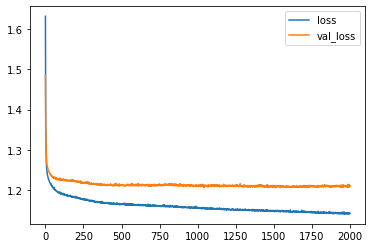

In [69]:
metrics[['loss','val_loss']].plot()

In [70]:
# Sequential predict_classes function is deprecated
# predictions = ai_brain.predict_classes(X_test)
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

91/91 [==============================] - 0s 1ms/step


In [72]:
x_test_predictions.shape

(2911,)

In [73]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [74]:
y_test_truevalue.shape

(2911,)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[340 131 107 179]
 [208 154 216 108]
 [118 125 353  90]
 [205  56  49 472]]


In [77]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.39      0.45      0.42       757
           1       0.33      0.22      0.27       686
           2       0.49      0.51      0.50       686
           3       0.56      0.60      0.58       782

    accuracy                           0.45      2911
   macro avg       0.44      0.45      0.44      2911
weighted avg       0.44      0.45      0.45      2911



In [78]:
ai_brain.save('customer_classification_model.h5')

In [79]:
import pickle
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,cust1,clean,scaler_age,enc,one_hot_enc,le], fh)

In [80]:
from tensorflow.keras.models import load_model
ai_brain = load_model('customer_classification_model.h5')

In [81]:
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

In [82]:
# Prediction for a single input
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 81ms/step


In [83]:
print(x_single_prediction)

[2]


In [84]:
print(le.inverse_transform(x_single_prediction))

['C']
